In [1]:
import numpy as np  
from sklearn.manifold import TSNE  
from sklearn.model_selection import train_test_split  
from sklearn.datasets import fetch_openml  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
  
# 加载数据集，这里我们使用MNIST作为例子  
mnist = fetch_openml('mnist_784', version=1)  
X, y = mnist.data, mnist.target  
  
# 将目标值转换为分类编码（如果必要的话）  
y = np.array([label for label in y])  
y = to_categorical(y) 
 

In [2]:
# 分割数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 定义模型  
model = Sequential()  
model.add(Dense(128, input_dim=784, activation='relu'))  # 输入维度为784  
model.add(Dense(10, activation='softmax'))  # 输出为10个类别的概率分布  
  
# 编译模型  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

d:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# 训练模型  
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8092 - loss: 8.4318 - val_accuracy: 0.8722 - val_loss: 0.5513
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8985 - loss: 0.4189 - val_accuracy: 0.9156 - val_loss: 0.4100
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9268 - loss: 0.2850 - val_accuracy: 0.9228 - val_loss: 0.3139
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9340 - loss: 0.2502 - val_accuracy: 0.9281 - val_loss: 0.3120
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9428 - loss: 0.2160 - val_accuracy: 0.9274 - val_loss: 0.2840
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9479 - loss: 0.2007 - val_accuracy: 0.9429 - val_loss: 0.2520
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9497 - loss: 0.1934 - val_accuracy: 0.9373 - val_loss: 0.2651
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9535 - loss: 0.186

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


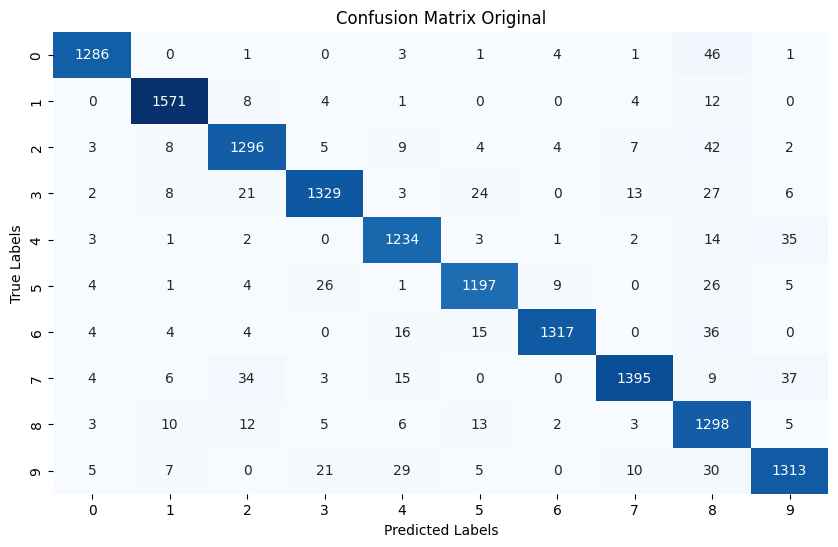

In [6]:
from sklearn.metrics import confusion_matrix,classification_report
y_pre=model.predict(X_test);
y_pred_classes = np.argmax(y_pre, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm=confusion_matrix(y_true_classes,y_pred_classes);
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Original")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [5]:
print(classification_report(y_true_classes,y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1343
           1       0.97      0.98      0.98      1600
           2       0.94      0.94      0.94      1380
           3       0.95      0.93      0.94      1433
           4       0.94      0.95      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.99      0.94      0.96      1396
           7       0.97      0.93      0.95      1503
           8       0.84      0.96      0.90      1357
           9       0.94      0.92      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [4]:
from PIL import Image
import numpy as np
import os

In [21]:
# 加载并预处理图片  
def preprocess_image(image_path):  
    image = Image.open(image_path).convert('L')  # 转换为灰度图  
    image = image.resize((28, 28), Image.BILINEAR ) 
    image_array = np.array(image)  # 归一化到0-1范围  
    image_array = image_array.flatten()  
    return image_array  
  

  
# 预测函数  
def predict_image(image_path, model):  
    # 预处理图片  
    image_array = preprocess_image(image_path)  
      
      
    # 使用Keras模型进行预测  
    prediction = model.predict(np.array([image_array]))  
    predicted_class = np.argmax(prediction)  
      
    return predicted_class, prediction  

In [26]:
image_path = 'C:/Users/Administrator/Desktop/Deep learning/Individual Proposal/hw/img_3.jpg'  

In [27]:
predicted_class, prediction = predict_image(image_path, model)  
print(f"Predicted class: {predicted_class}")  
print(f"Prediction probabilities: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: 9
Prediction probabilities: [[4.4252630e-16 7.5657386e-05 1.8830313e-05 1.2782146e-02 2.2836688e-01
  3.7117497e-04 5.7158201e-07 1.1520889e-02 9.9662198e-03 7.3689759e-01]]


In [28]:
Image.open(image_path)

In [32]:
prediction

array([[4.4252630e-16, 7.5657386e-05, 1.8830313e-05, 1.2782146e-02,
        2.2836688e-01, 3.7117497e-04, 5.7158201e-07, 1.1520889e-02,
        9.9662198e-03, 7.3689759e-01]], dtype=float32)